In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.ticker import PercentFormatter
from matplotlib.colors import Normalize

In [2]:
# 폰트 설정
import matplotlib as mpl
import matplotlib.font_manager as fm

font_path = r"C:\Windows\Fonts\malgun.ttf"  
font_prop = fm.FontProperties(fname=font_path)
mpl.rcParams['font.family'] = font_prop.get_name()
mpl.rcParams['axes.unicode_minus'] = False

In [3]:
# data load
df = pd.read_csv(r'C:\Users\user\Desktop\연구\5. 국방부 용역과제\250730.csv')
df_geo = pd.read_csv(r'..\datasets\df_geo_new.csv') # 위경도 좌표

print(df.head())
print(df_geo.head())

   순번                   출발지 주소              중간집결지 주소            최종 도착지 주소  \
0   1  경기도 고양시 덕양구 중앙로633번길 12   경기도 고양시 덕양구 혜음로 142  경기도 고양시 덕양구 혜음로 142   
1   2   대구광역시 서구 북비산로61길 20-24      경상북도 경주시 태종로 516  경기도 고양시 덕양구 동헌로 305   
2   3   서울특별시 양천구 목동중앙본로11길 19  서울특별시 서초구 사평대로45길 26  강원특별자치도 동해시 대동로 430   
3   4        서울특별시 강남구 학동로 432       경기도 과천시 중앙로 294      경기도 과천시 중앙로 294   
4   5         대구광역시 남구 명덕로 236      대구광역시 수성구 무열로 56     대구광역시 수성구 무열로 56   

    중간집결 기한    최종도착 기한 이동방법  
0  0+1일 14시   0+1일 14시   개별  
1  0+28일 9시  0+28일 14시   집단  
2   0+3일 8시   0+3일 14시   집단  
3  0+1일 14시   0+1일 14시   개별  
4  0+3일 14시   0+3일 14시   개별  
   num  start_lat   start_lng    mid_lat     mid_lng    end_lat     end_lng
0    1  37.626949  126.827581  37.713020  126.902443  37.713020  126.902443
1    2  35.881731  128.567540  35.839566  129.185196  37.713651  126.889915
2    3  37.540484  126.867756  37.506451  127.012692  37.503393  129.130509
3    4  37.517981  127.048764  37.441493  126.996973 

In [ ]:
# # 위경도 소수점 넷 째 자리까지 반올림
# df_geo['start_lat'] = np.around(df_geo['start_lat'], 4)
# df_geo['start_lng'] = np.around(df_geo['start_lng'], 4)
# df_geo['mid_lat'] = np.around(df_geo['mid_lat'], 4)
# df_geo['mid_lng'] = np.around(df_geo['mid_lng'], 4)
# df_geo['end_lat'] = np.around(df_geo['end_lat'], 4)
# df_geo['end_lng'] = np.around(df_geo['end_lng'], 4)

In [4]:
df_geo.shape

(815775, 7)

In [5]:
# Merge
df_merge = pd.merge(df, df_geo, left_on = '순번', right_on = 'num', how = 'left').drop(columns = ['num'])

print(df_merge.head(3))
print(df_merge.tail(3))

   순번                   출발지 주소              중간집결지 주소            최종 도착지 주소  \
0   1  경기도 고양시 덕양구 중앙로633번길 12   경기도 고양시 덕양구 혜음로 142  경기도 고양시 덕양구 혜음로 142   
1   2   대구광역시 서구 북비산로61길 20-24      경상북도 경주시 태종로 516  경기도 고양시 덕양구 동헌로 305   
2   3   서울특별시 양천구 목동중앙본로11길 19  서울특별시 서초구 사평대로45길 26  강원특별자치도 동해시 대동로 430   

    중간집결 기한    최종도착 기한 이동방법  start_lat   start_lng    mid_lat     mid_lng  \
0  0+1일 14시   0+1일 14시   개별  37.626949  126.827581  37.713020  126.902443   
1  0+28일 9시  0+28일 14시   집단  35.881731  128.567540  35.839566  129.185196   
2   0+3일 8시   0+3일 14시   집단  37.540484  126.867756  37.506451  127.012692   

     end_lat     end_lng  
0  37.713020  126.902443  
1  37.713651  126.889915  
2  37.503393  129.130509  
            순번                    출발지 주소               중간집결지 주소  \
815772  815773      광주광역시 광산구 장신로19번길 10       광주광역시 북구 우치로 339   
815773  815774        서울특별시 동작구 사당로8길 55  서울특별시 강동구 양재대로156길 11   
815774  815775  경기도 성남시 중원구 자혜로17번길 42-3     강원특별자치도 원주시 연세대길 1   

     

In [ ]:
# statistics
print(df_merge.shape)
print(df_merge['이동방법'].value_counts())

# 위경도 NA 확인
num_na = df_merge.isna().any(axis = 1).sum()
mask = df_merge.notna().all(axis = 1)
print('num_na:', num_na)

df_merge = df_merge[mask].reset_index(drop = True)
print(df_merge)
print(df_merge['이동방법'].value_counts())
# 변환안된 것: 5,067행
# 사용가능 총: 810,708행

# # 저장
# df_merge.to_csv('bottle.csv', index = False, encoding = 'cp949')

(810708, 13)
이동방법
개별    472214
집단    338494
Name: count, dtype: int64
num_na: 0
            순번                    출발지 주소                  중간집결지 주소  \
0            1   경기도 고양시 덕양구 중앙로633번길 12       경기도 고양시 덕양구 혜음로 142   
1            2    대구광역시 서구 북비산로61길 20-24          경상북도 경주시 태종로 516   
2            3    서울특별시 양천구 목동중앙본로11길 19      서울특별시 서초구 사평대로45길 26   
3            4         서울특별시 강남구 학동로 432           경기도 과천시 중앙로 294   
4            5          대구광역시 남구 명덕로 236          대구광역시 수성구 무열로 56   
...        ...                       ...                       ...   
810703  815771         서울특별시 마포구 만리재로 60          경기도 남양주시 덕릉로 967   
810704  815772           충청남도 아산시 실옥로 15  충청남도 천안시 동남구 천안대로 429-13   
810705  815773      광주광역시 광산구 장신로19번길 10          광주광역시 북구 우치로 339   
810706  815774        서울특별시 동작구 사당로8길 55     서울특별시 강동구 양재대로156길 11   
810707  815775  경기도 성남시 중원구 자혜로17번길 42-3        강원특별자치도 원주시 연세대길 1   

                      최종 도착지 주소   중간집결 기한    최종도착 기한 이동방법  start_lat  \
0      

In [15]:
df_merge['이동방법'].unique()

array(['개별', '집단'], dtype=object)

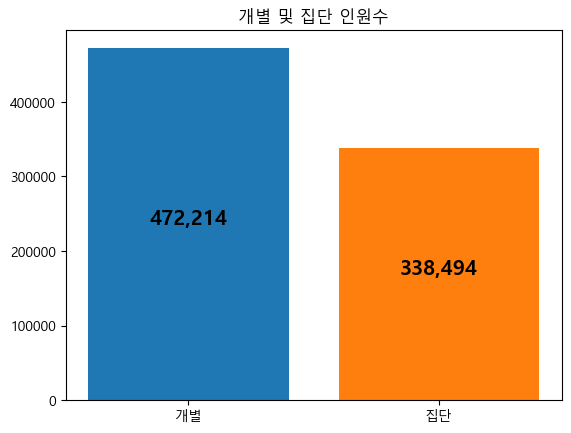

In [16]:
x = df_merge['이동방법'].unique()
height = df_merge['이동방법'].value_counts()
color = colors = plt.cm.tab10(range(len(x)))

barplot = plt.bar(x = x, height = height, width = 0.8, align= 'center', color=color)

for bar in barplot:
    value = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,  # x 위치 (막대 중앙)
        value/2,                            # y 위치 (막대 높이)
        f'{value:,}',                       # 표시할 텍스트
        ha='center', fontsize=15, fontweight='bold'
    )

plt.title('개별 및 집단 인원수')
plt.show()

In [17]:
# 시간 변환
# 중간시간 변환
df_merge_mid = df_merge['중간집결 기한'].str.split('일', expand = True)
df_merge_mid.columns = ['Mday_mid', 'Mhour_mid']
df_merge_mid['Mday_mid'] = df_merge_mid['Mday_mid'].str.replace('0+', '').astype(int)
df_merge_mid['Mhour_mid'] = df_merge_mid['Mhour_mid'].str.replace('시', '').astype(int)
df_merge_mid['mid_td'] = (pd.to_timedelta(df_merge_mid['Mday_mid'], unit = 'D') + pd.to_timedelta(df_merge_mid['Mhour_mid'], unit = 'h'))

# 최종시간 변환
df_merge_end = df_merge['최종도착 기한'].str.split('일', expand = True)
df_merge_end.columns = ['Mday_end', 'Mhour_end']
df_merge_end['Mday_end'] = df_merge_end['Mday_end'].str.replace('0+', '').astype(int)
df_merge_end['Mhour_end'] = df_merge_end['Mhour_end'].str.replace('시', '').astype(int)
df_merge_end['end_td'] = (pd.to_timedelta(df_merge_end['Mday_end'], unit = 'D') + pd.to_timedelta(df_merge_end['Mhour_end'], unit = 'h'))

df_merge = pd.concat([df_merge, df_merge_mid, df_merge_end], axis = 1).drop(columns = ['중간집결 기한', '최종도착 기한', 'Mday_mid', 'Mhour_mid', 'Mday_end', 'Mhour_end']).reset_index(drop = True)
print(df_merge.head(3))

   순번                   출발지 주소              중간집결지 주소            최종 도착지 주소  \
0   1  경기도 고양시 덕양구 중앙로633번길 12   경기도 고양시 덕양구 혜음로 142  경기도 고양시 덕양구 혜음로 142   
1   2   대구광역시 서구 북비산로61길 20-24      경상북도 경주시 태종로 516  경기도 고양시 덕양구 동헌로 305   
2   3   서울특별시 양천구 목동중앙본로11길 19  서울특별시 서초구 사평대로45길 26  강원특별자치도 동해시 대동로 430   

  이동방법  start_lat  start_lng  mid_lat   mid_lng  end_lat   end_lng  \
0   개별    37.6269   126.8276  37.7130  126.9024  37.7130  126.9024   
1   집단    35.8817   128.5675  35.8396  129.1852  37.7137  126.8899   
2   집단    37.5405   126.8678  37.5065  127.0127  37.5034  129.1305   

            mid_td           end_td  
0  1 days 14:00:00  1 days 14:00:00  
1 28 days 09:00:00 28 days 14:00:00  
2  3 days 08:00:00  3 days 14:00:00  


In [18]:
# 집단 / 개별 split
df_group = df_merge[df_merge['이동방법'] == '집단'].drop(columns = '이동방법')
df_solo = df_merge[df_merge['이동방법'] == '개별'].drop(columns = '이동방법')

end_td
1     151333
2      44048
3      26133
4      16317
5      10479
6       3288
7      25695
8        541
10       740
11      1203
12      6575
13      2336
14      7329
15      3339
17       726
18       591
19       947
20      6341
21      7250
23       801
26       371
27       817
28     14728
30      6566
Name: count, dtype: int64


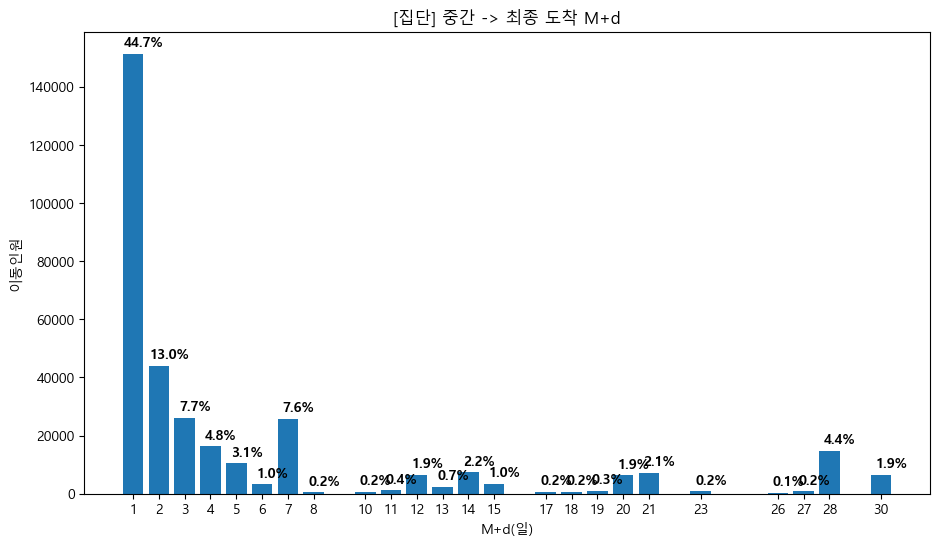

In [19]:
# (집단) 도착 기한 시각화
# temp1 = df_group['mid_td'].dt.days.value_counts().sort_index()
# x1 = temp1.index
# y1 = temp1.values

temp2 = df_group['end_td'].dt.days.value_counts().sort_index()
x2 = temp2.index
y2 = temp2.values

# print(temp1.head(5))
print(temp2)

fig = plt.figure(figsize = (24,6))
# ax = fig.add_subplot(1,2,1)
# ax.bar(x = x1, height = y1)
# ax.set_xlabel('경과 일수 (days)')
# ax.set_ylabel('인원')
# ax.set_title('집단-중간 도착까지 M+d')
# ax.set_xticks(x1)
# ax.tick_params(axis='y')

ax = fig.add_subplot(1,2,2)
barplot = ax.bar(x = x2, height = y2)

for idx, bar in enumerate(barplot):
    value = y2[idx]/np.sum(y2)
    plt.text(
        bar.get_x() + bar.get_width(),
        bar.get_height()+ (max(y2) * 0.01),
        f'{value:.1%}',
        ha = 'center', va = 'bottom', fontweight = 'bold'
    )

ax.set_xlabel('M+d(일)')
ax.set_ylabel('이동인원')
ax.set_title('[집단] 중간 -> 최종 도착 M+d')
ax.set_xticks(x2)
ax.tick_params(axis='y')

plt.show()

end_td
1     264339
2      44097
3      38980
4      17767
5      17703
6       4067
7      20127
8       1721
9        155
10      1648
11      3466
12     11188
13      2868
14      2169
15      4366
16       750
17       787
18       849
19      3447
20      8542
21      3243
23      2442
24       228
25        99
26       265
27       814
28      5117
29        72
30     10898
Name: count, dtype: int64


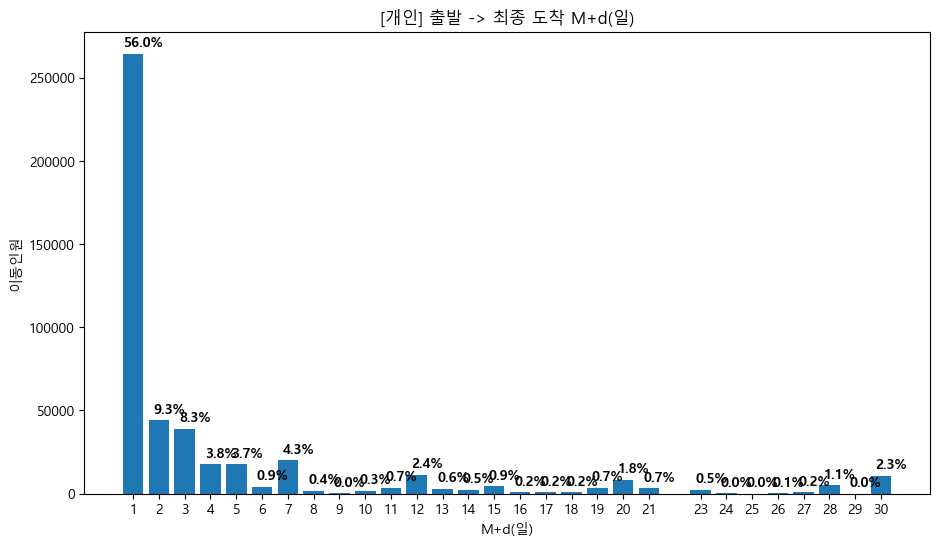

In [20]:
# (개인) 도착 기한 시각화
# temp1 = df_solo['mid_td'].dt.days.value_counts().sort_index()
# x1 = temp1.index
# y1 = temp1.values

temp2 = df_solo['end_td'].dt.days.value_counts().sort_index()
x2 = temp2.index
y2 = temp2.values

# print(temp1.head(5))
print(temp2)

fig = plt.figure(figsize = (24,6))
# ax = fig.add_subplot(1,2,1)
# ax.bar(x = x1, height = y1)
# ax.set_xlabel('경과 일수 (days)')
# ax.set_ylabel('인원')
# ax.set_title('개인-중간 도착까지 M+d')
# ax.set_xticks(x1)
# ax.tick_params(axis='y')

ax = fig.add_subplot(1,2,2)
barplot = ax.bar(x = x2, height = y2)

for idx, bar in enumerate(barplot):
    value = y2[idx]/np.sum(y2)
    plt.text(
        bar.get_x() + bar.get_width(),
        bar.get_height()+ (max(y2) * 0.01),
        f'{value:.1%}',
        ha = 'center', va = 'bottom', fontweight = 'bold'
    )

ax.set_xlabel('M+d(일)')
ax.set_ylabel('이동인원')
ax.set_title('[개인] 출발 -> 최종 도착 M+d(일)')
ax.set_xticks(x2)
ax.tick_params(axis='y')

plt.show()

# EDA

## 집단

In [13]:
# (집단) 중간 시간 = 최종 시간
mask1 = df_group['mid_td'] == df_group['end_td']
mask2 = (df_group['mid_lat'] == df_group['end_lat']) & (df_group['mid_lng'] == df_group['end_lng'])

mask3 = mask1 & mask2
df_group[mask3]

,순번,출발지 주소,중간집결지 주소,최종 도착지 주소,start_lat,start_lng,mid_lat,mid_lng,end_lat,end_lng,mid_td,end_td


In [14]:
# (집단) 중간 장소 = 최종 장소
mask1 = (df_group['mid_lat'] == df_group['end_lat']) & (df_group['mid_lng'] == df_group['end_lng'])
print(df_group[mask1].shape)
# 50,640건

#  (중간 장소 = 최종 장소) & (중간 시간 != 최종 시간)
mask2 = df_group['mid_td'] != df_group['end_td']
mask3 = mask1 & mask2
df_group[mask3]
# 1건

(1, 12)


,순번,출발지 주소,중간집결지 주소,최종 도착지 주소,start_lat,start_lng,mid_lat,mid_lng,end_lat,end_lng,mid_td,end_td
170692,171406,경기도 시흥시 하중로209번길 9,강원특별자치도 원주시 북원로 2777,강원특별자치도 원주시 북원로 2777,37.3946,126.8068,37.39,127.9441,37.39,127.9441,3 days 11:00:00,3 days 14:00:00


In [15]:
#(중간 장소 != 최종 장소) & (중간 시간 = 최종 시간)
mask1 = (df_group['mid_lat'] != df_group['end_lat']) | (df_group['mid_lng'] != df_group['end_lng'])
mask2 = df_group['mid_td'] == df_group['end_td']
mask3 = mask1 & mask2

df_temp = df_group.loc[mask3].copy()
print(df_temp.shape)
# 10,959건 존재

# 그렇다면 실제로 떨어진 거리는? 위경도로 거리 계산.
# >> geopy 라이브러리 활용
from geopy.distance import geodesic

def distance(row):
    try:
        return geodesic((row['mid_lat'], row['mid_lng']), (row['end_lat'], row['end_lng'])).km
    except Exception:
        return np.nan

df_temp['mid_to_end'] = df_temp.apply(distance, axis = 1)

df_temp[df_temp[df_temp.notna()]['mid_to_end'] >= 3]
# 가정: "1시간에 늦어도 3km를 걷는다고 하면, 3km 이상 떨어진 것은 데이터가 잘못된 것이다."
# 2562건 존재.

# df_temp.to_csv('error_df.csv', index = False, encoding = 'cp949')

(0, 12)


,순번,출발지 주소,중간집결지 주소,최종 도착지 주소,start_lat,start_lng,mid_lat,mid_lng,end_lat,end_lng,mid_td,end_td,mid_to_end


In [16]:
from geopy.distance import geodesic

def distance(row):
    try:
        return geodesic((row['start_lat'], row['start_lng']), (row['mid_lat'], row['mid_lng'])).km
    except Exception:
        return np.nan

df_group['start_to_mid'] = df_group.apply(distance, axis = 1)


In [17]:
np.mean(df_group['start_to_mid'])

np.float64(23.078760438596255)

In [ ]:
df_group['start_to_mid'] = df_group.apply(distance, axis = 1)


In [18]:
df_solo['start_to_mid'] = df_solo.apply(distance, axis = 1)
np.mean(df_solo['start_to_mid'])

np.float64(28.55757013288196)

In [ ]:
#  중간 시간 > 최종 시간
df_group[df_group['mid_td'] > df_group['end_td']]
# 없다. 정상.

,순번,출발지 주소,중간집결지 주소,최종 도착지 주소,start_lat,start_lng,mid_lat,mid_lng,end_lat,end_lng,mid_td,end_td


## ■ 개별

In [ ]:
# (개별) 중간 장소 != 최종 장소
print(df_solo[(df_solo['mid_lat'] != df_solo['end_lat']) | (df_solo['mid_lng'] != df_solo['end_lng'])].shape)
df_solo[(df_solo['mid_lat'] != df_solo['end_lat']) | (df_solo['mid_lng'] != df_solo['end_lng'])].head()
# 1건
# 거의 차이 없음. 무시가능

(1, 12)


,순번,출발지 주소,중간집결지 주소,최종 도착지 주소,start_lat,start_lng,mid_lat,mid_lng,end_lat,end_lng,mid_td,end_td
304860,311085,경기도 수원시 권선구 권중로 110,경기도 화성시 푸른들판로 1263,경기도 화성시 푸른들판로 1263,37.2487,37.2487,37.216,126.8721,37.2161,126.8721,1 days 14:00:00,1 days 14:00:00


In [ ]:
# (개별) 중간 시간 != 최종 시간
mask1 = df_solo['mid_td'] != df_solo['end_td']
print(df_solo[mask1].shape)
print(df_solo[mask1].head())
# 296건

# (중간 시간 != 최종 시간) & (중간 장소 != 최종 장소)
mask2 = (df_solo['mid_lat'] != df_solo['end_lat']) | (df_solo['mid_lng'] != df_solo['end_lng'])
mask3 = mask1 & mask2

df_solo[mask3]
# 0건

# 중간장소와 최종장소는 모두 같은데, 도착시간이 다른 경우가 296건 있다.

(296, 12)
          순번                출발지 주소                중간집결지 주소  \
8895    9022  강원특별자치도 원주시 서원대로 290  강원특별자치도 춘천시 영서로 3272-1   
10457  10602      경기도 파주시 와석순환로 15        경기도 양주시 감악산로 218   
20730  21019  강원특별자치도 춘천시 영서로 3034  강원특별자치도 춘천시 영서로 3272-1   
22497  22817   경기도 수원시 장안구 수성로 271     경기도 수원시 팔달구 고화로 120   
25616  25971    경기도 고양시 덕양구 신원로 60        경기도 양주시 감악산로 218   

                    최종 도착지 주소  start_lat  start_lng  mid_lat   mid_lng  \
8895   강원특별자치도 춘천시 영서로 3272-1    37.3372    37.3372  37.9418  127.7146   
10457        경기도 양주시 감악산로 218    37.7093    37.7093  37.8847  126.9800   
20730  강원특별자치도 춘천시 영서로 3272-1    37.9230    37.9230  37.9418  127.7146   
22497     경기도 수원시 팔달구 고화로 120    37.2904    37.2904  37.2802  127.0075   
25616        경기도 양주시 감악산로 218    37.6657    37.6657  37.8847  126.9800   

       end_lat   end_lng          mid_td          end_td  
8895   37.9418  127.7146 1 days 08:00:00 1 days 10:00:00  
10457  37.8847  126.9800 1 days 11:00:00 1 days 14:00:

,순번,출발지 주소,중간집결지 주소,최종 도착지 주소,start_lat,start_lng,mid_lat,mid_lng,end_lat,end_lng,mid_td,end_td


In [ ]:
#  중간 시간 > 최종 시간
df_solo[df_solo['mid_td'] > df_solo['end_td']]
# 없다. 정상.

,순번,출발지 주소,중간집결지 주소,최종 도착지 주소,start_lat,start_lng,mid_lat,mid_lng,end_lat,end_lng,mid_td,end_td


# 시각화

## 이동인원 시뮬레이션

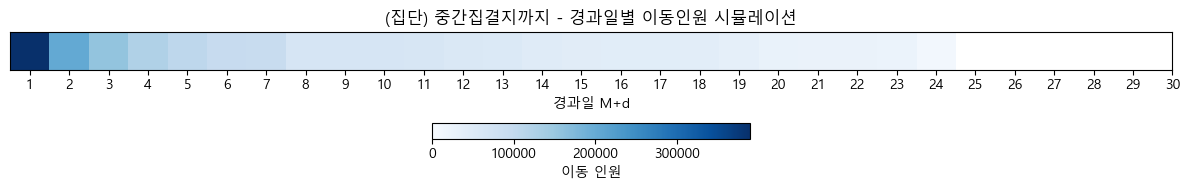

In [ ]:
# (집단) 출발 -> 중간집결지
temp1 = df_group['mid_td'].dt.days.value_counts().sort_index()
total = temp1.sum()
cum = temp1.cumsum()

moving = total - cum.shift(fill_value = 0)

norm = Normalize(vmin=0, vmax=moving.max())
cmap = plt.get_cmap('Blues')

moving_array = moving.values[np.newaxis, :]
min_day = temp1.index.min()
max_day = temp1.index.max()

fig, ax = plt.subplots(figsize=(12, 2))
im = ax.imshow(
    moving_array,
    aspect = 'auto',
    cmap = cmap,
    norm = norm,
    # extent=[min_day-1.25, max_day, 0, 1]
)

ax.set_xlabel('경과일 M+d')
ax.set_title('(집단) 중간집결지까지 - 경과일별 이동인원 시뮬레이션')

ax.set_xticks(np.arange(min_day-1, max_day))
ax.set_xticklabels(np.arange(min_day, max_day+1))
ax.set_yticks([])

cbar = fig.colorbar(im, ax = ax, orientation = 'horizontal', pad = 0.5)
cbar.set_label('이동 인원')

fig.subplots_adjust(bottom=0.25)

plt.tight_layout()
plt.show()


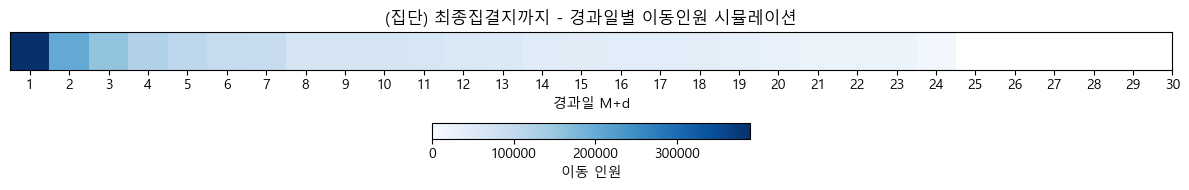

In [ ]:
# (집단) 중간 -> 최종집결지
temp1 = df_group['end_td'].dt.days.value_counts().sort_index()
total = temp1.sum()
cum = temp1.cumsum()

moving = total - cum.shift(fill_value = 0)

norm = Normalize(vmin=0, vmax=moving.max())
cmap = plt.get_cmap('Blues')

moving_array = moving.values[np.newaxis, :]
min_day = temp1.index.min()
max_day = temp1.index.max()

fig, ax = plt.subplots(figsize=(12, 2))
im = ax.imshow(
    moving_array,
    aspect = 'auto',
    cmap = cmap,
    norm = norm,
    # extent=[min_day-1.25, max_day, 0, 1]
)

ax.set_xlabel('경과일 M+d')
ax.set_title('(집단) 최종집결지까지 - 경과일별 이동인원 시뮬레이션')

ax.set_xticks(np.arange(min_day-1, max_day))
ax.set_xticklabels(np.arange(min_day, max_day+1))
ax.set_yticks([])

cbar = fig.colorbar(im, ax = ax, orientation = 'horizontal', pad = 0.5)
cbar.set_label('이동 인원')

fig.subplots_adjust(bottom=0.25)

plt.tight_layout()
plt.show()


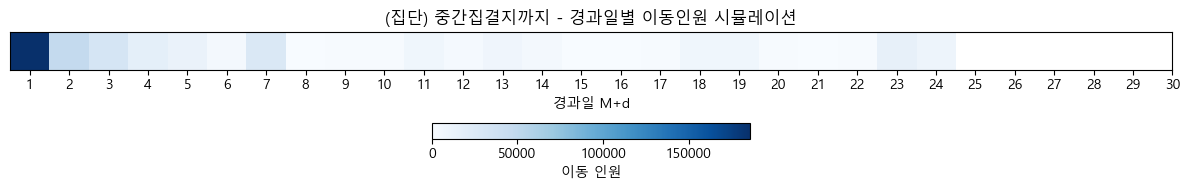

In [ ]:
# (집단) 출발 -> 중간집결지
# 하루전에 출발하지 않을까 보통...
temp1 = df_group['mid_td'].dt.days.value_counts().sort_index()

norm = Normalize(vmin=0, vmax=temp1.max())
cmap = plt.get_cmap('Blues')

moving_array = temp1.values[np.newaxis, :]
min_day = temp1.index.min()
max_day = temp1.index.max()

fig, ax = plt.subplots(figsize=(12, 2))
im = ax.imshow(
    moving_array,
    aspect = 'auto',
    cmap = cmap,
    norm = norm,
    # extent=[min_day-1.25, max_day, 0, 1]
)

ax.set_xlabel('경과일 M+d')
ax.set_title('(집단) 중간집결지까지 - 경과일별 이동인원 시뮬레이션')

ax.set_xticks(np.arange(min_day-1, max_day))
ax.set_xticklabels(np.arange(min_day, max_day+1))
ax.set_yticks([])

cbar = fig.colorbar(im, ax = ax, orientation = 'horizontal', pad = 0.5)
cbar.set_label('이동 인원')

fig.subplots_adjust(bottom=0.25)

plt.tight_layout()
plt.show()


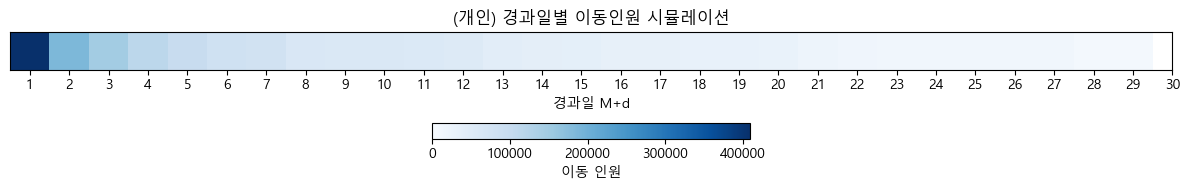

In [ ]:
# (개인) 출발 -> 최종집결지
temp1 = df_solo['end_td'].dt.days.value_counts().sort_index()
total = temp1.sum()
cum = temp1.cumsum()

moving = total - cum.shift(fill_value = 0)

norm = Normalize(vmin=0, vmax=moving.max())
cmap = plt.get_cmap('Blues')

moving_array = moving.values[np.newaxis, :]
min_day = temp1.index.min()
max_day = temp1.index.max()

fig, ax = plt.subplots(figsize=(12, 2))
im = ax.imshow(
    moving_array,
    aspect = 'auto',
    cmap = cmap,
    norm = norm,
    # extent=[min_day-1.25, max_day, 0, 1]
)

ax.set_xlabel('경과일 M+d')
ax.set_title('(개인) 경과일별 이동인원 시뮬레이션')

ax.set_xticks(np.arange(min_day-1, max_day))
ax.set_xticklabels(np.arange(min_day, max_day+1))
ax.set_yticks([])

cbar = fig.colorbar(im, ax = ax, orientation = 'horizontal', pad = 0.5)
cbar.set_label('이동 인원')

fig.subplots_adjust(bottom=0.25)

plt.tight_layout()
plt.show()


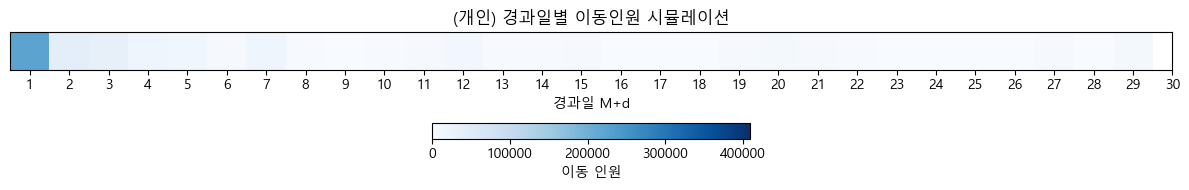

In [ ]:
# (개인) 출발 -> 최종집결지
# 이것도 하루전날에 출발하지 않을까...
temp1 = df_solo['end_td'].dt.days.value_counts().sort_index()

norm = Normalize(vmin=0, vmax=moving.max())
cmap = plt.get_cmap('Blues')

moving_array = temp1.values[np.newaxis, :]
min_day = temp1.index.min()
max_day = temp1.index.max()

fig, ax = plt.subplots(figsize=(12, 2))
im = ax.imshow(
    moving_array,
    aspect = 'auto',
    cmap = cmap,
    norm = norm,
    # extent=[min_day-1.25, max_day, 0, 1]
)

ax.set_xlabel('경과일 M+d')
ax.set_title('(개인) 경과일별 이동인원 시뮬레이션')

ax.set_xticks(np.arange(min_day-1, max_day))
ax.set_xticklabels(np.arange(min_day, max_day+1))
ax.set_yticks([])

cbar = fig.colorbar(im, ax = ax, orientation = 'horizontal', pad = 0.5)
cbar.set_label('이동 인원')

fig.subplots_adjust(bottom=0.25)

plt.tight_layout()
plt.show()


In [ ]:
temp1

end_td
1     223536
2      39111
3      32867
4      16614
5      15709
6       3943
7      16793
8       1720
9        154
10      1648
11      3466
12     11182
13      2868
14      2168
15      4341
16       750
17       787
18       849
19      3421
20      7758
21      3243
23      2108
24       228
25        99
26       265
27       794
28      4707
29        72
30      8217
Name: count, dtype: int64

## 도착가능 여부 시뮬레이션

In [ ]:
# 데이터 임의 생성
temp1 = df_group['mid_td'].dt.days

mid_result_lim = np.around((1-(temp1-1)/(max(temp1))) * 0.3, 2) # 첫 날 제한 30%라 가정
mid_result_impos = np.around((1-(temp1-1)/(max(temp1))) * 0.2, 2) # 첫 날 불가능 20%라 가정
mid_result_pos = 1 - mid_result_impos - mid_result_lim

df_group['mid_result_pos'] = mid_result_pos
df_group['mid_result_lim'] = mid_result_lim
df_group['mid_result_impos'] = mid_result_impos

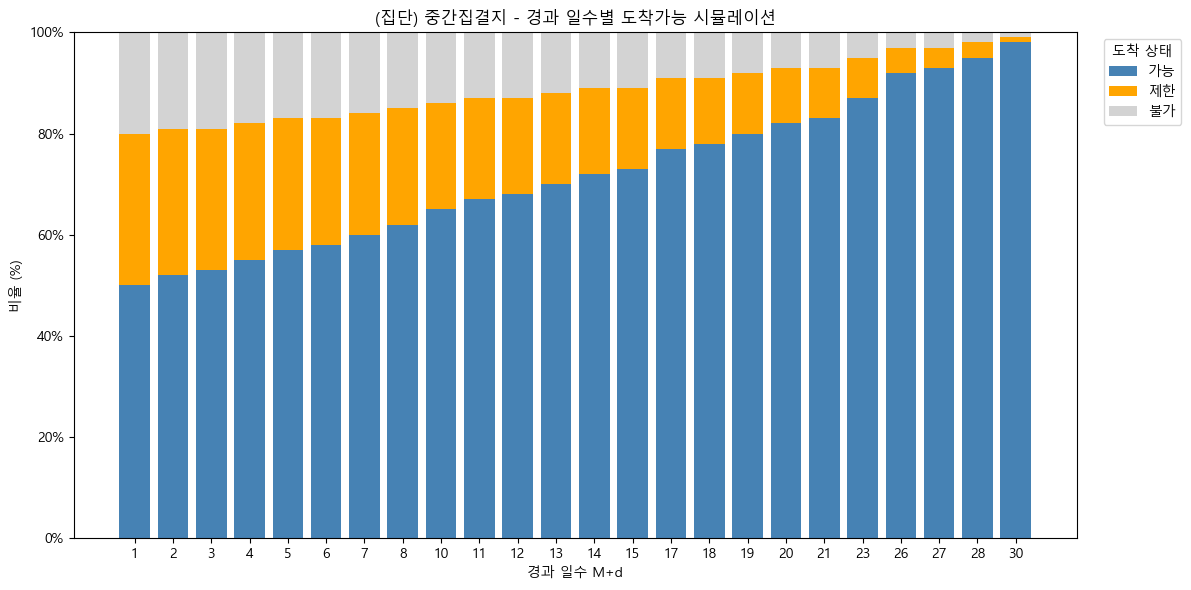

In [ ]:
# 가능/제한/불가 시각화
df = df_group.copy()
df['mid_day'] = df['mid_td'].dt.days

# 일별 평균 비율
daily = df.groupby('mid_day')[['mid_result_pos','mid_result_lim','mid_result_impos']] \
    .mean().sort_index()
real_days = daily.index.values
positions = np.arange(len(real_days))

fig, ax = plt.subplots(figsize=(12, 6))

ax.bar(positions, daily['mid_result_pos'],
       label = '가능', color = 'steelblue')
ax.bar(positions, daily['mid_result_lim'], 
       bottom = daily['mid_result_pos'], label='제한', color = 'orange')
ax.bar(positions, daily['mid_result_impos'], 
       bottom = daily['mid_result_pos'] + daily['mid_result_lim'], 
       label = '불가', color = 'lightgray')

ax.set_xlabel('경과 일수 M+d')
ax.set_ylabel('비율 (%)')
ax.set_title('(집단) 중간집결지 - 경과 일수별 도착가능 시뮬레이션')

ax.set_ylim(0, 1)
ax.set_xticks(positions)
ax.set_xticklabels(real_days)  

ax.legend(loc = 'upper left', bbox_to_anchor = (1.02, 1), title='도착 상태')
ax.yaxis.set_major_formatter(PercentFormatter(xmax = 1.0, decimals = 0))

plt.tight_layout()
plt.show()

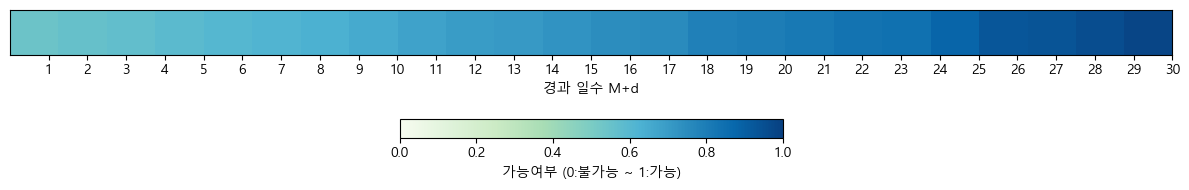

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm
from matplotlib.colors import Normalize

score = 1.0 * daily['mid_result_pos'] + \
        0.1 * daily['mid_result_lim'] + \
        0.05 * daily['mid_result_impos']
score_array = score.values[np.newaxis, :]

norm = Normalize(vmin=0, vmax=1)
cmap = plt.get_cmap('GnBu')


fig, ax = plt.subplots(figsize=(12, 2))
im = ax.imshow(
    score_array,
    aspect='auto',
    cmap=cmap,
    norm=norm,
    extent=[daily.index.min()-1, daily.index.max(), 0, 1]
)

ax.set_xlabel('경과 일수 M+d')
# ax.set_title('(집단) 중간집결지 - 경과 일수별 도착가능 시뮬레이션')

ax.set_xticks(np.array(range(daily.index.min(),daily.index.max()+1)))
ax.set_yticks([])

cbar = fig.colorbar(im, ax=ax, orientation='horizontal', pad=0.5)
cbar.set_label('가능여부 (0:불가능 ~ 1:가능)')

fig.subplots_adjust(bottom=0.25)  # 그림 아래쪽 여유 공간 확보

plt.tight_layout()
plt.show()
